In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("EastWestAirlines.xlsx", sheet_name='data')

In [3]:
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
norm = StandardScaler()

In [6]:
norm = norm.fit_transform(df)

In [7]:
norm_data = pd.DataFrame(norm)

In [8]:
norm_data

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.735125,-0.451141,-0.186299,-0.769578,-0.098242,-0.062767,-0.702786,-1.104065,-0.328603,-0.362168,1.395454,-0.766919
1,-1.734263,-0.539457,-0.186299,-0.769578,-0.098242,-0.062767,-0.701088,-0.999926,-0.328603,-0.362168,1.379957,-0.766919
2,-1.733402,-0.320031,-0.186299,-0.769578,-0.098242,-0.062767,-0.539253,-0.791649,-0.328603,-0.362168,1.411920,-0.766919
3,-1.732540,-0.583799,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,-0.328603,-0.362168,1.372208,-0.766919
4,-1.731679,0.239678,-0.186299,1.409471,-0.098242,-0.062767,1.083121,1.499394,1.154932,0.692490,1.363975,1.303918
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,1.725097,-0.547079,-0.186299,-0.769578,-0.098242,-0.062767,-0.356960,-0.791649,-0.185750,-0.098503,-1.315120,1.303918
3995,1.725958,-0.091465,-0.186299,-0.769578,-0.098242,-0.062767,-0.669367,-0.687511,-0.328603,-0.362168,-1.318994,1.303918
3996,1.726820,-0.000043,-0.186299,0.683121,-0.098242,-0.062767,0.343804,-0.375096,-0.328603,-0.362168,-1.315604,1.303918
3997,1.727682,-0.185607,-0.186299,-0.769578,-0.098242,-0.062767,-0.689286,-1.104065,0.028531,-0.098503,-1.316088,-0.766919


In [24]:
from sklearn.cluster import KMeans

In [32]:
wcss = []
for i in range(1,20):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(norm_data)
    wcss.append(kmeans.inertia_)

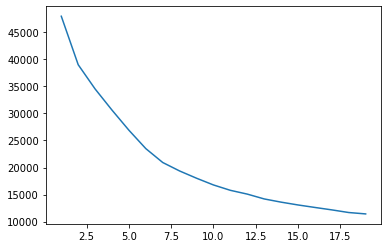

In [33]:
plt.plot(range(1,20), wcss)

In [36]:
from sklearn.cluster import KMeans

In [55]:
model = KMeans(n_clusters=7)

In [56]:
prid = model.fit_predict(norm_data)

In [57]:
df['Clusters'] = prid

In [58]:
df[:40]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,2
5,6,16420,0,1,1,1,0,0,0,0,6942,0,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,2
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,0
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1,5
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,2


In [59]:
df.Clusters.value_counts()

1    1489
0    1264
2    1006
4     124
3      58
5      43
6      15
Name: Clusters, dtype: int64